# eLABJournal and jupyter : experiments
Access to your eLABJournal experiments from jupyter

Use the elabjournal package, create an object to access the API.

In [1]:
from elabjournal import elabjournal
eLAB = elabjournal.api()

Welcome Matthijs Brouwer
Package 'elabjournal', version '0.0.12'
Your active group is 'Testgroup' (6727)


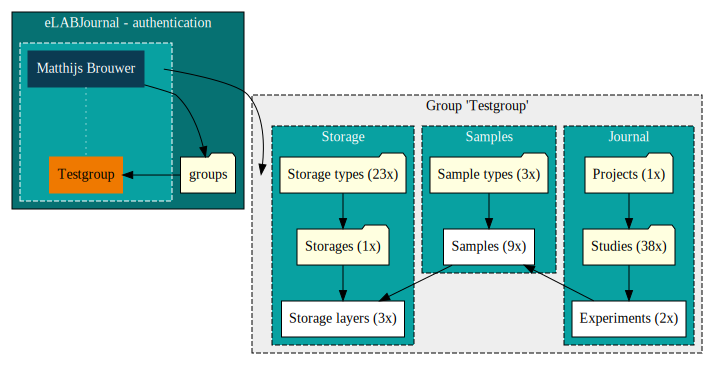

In [2]:
#always use a specific group for this example
eLAB.set_group(6727)
#visualize
eLAB.visualize()

In eLABJournal, experiments are organized by project. Projects organize a collection of studies, which, in turn, organizes a collection of experiments. 

In [3]:
projects = eLAB.projects()
#projects.show(["name", "numStudies"])
projects.all(["name", "numStudies"])

,name,numStudies
projectID,,
22534,testproject,1


In [4]:
studies = eLAB.studies(projects.first())
#studies.show(["name", "description"])
studies.all(["name", "description"])

,name,description
studyID,,
74113,Teststudy,


## Experiments

An **experiments object** can be created that describes all the experiments. By providing parameters (see `help(eLAB.experiments)`) this set can be filtered and sorted.

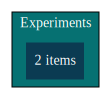

In [5]:
experiments = eLAB.experiments(sort="experimentID")
experiments.visualize()

The available fields for the experiments can be listed.

In [6]:
experiments.fields()

['created',
 'deleted',
 'dependencyExperimentID',
 'description',
 'due',
 'experimentStatus.color',
 'experimentStatus.experimentStatusID',
 'experimentStatus.experimentStatusType',
 'experimentStatus.groupID',
 'experimentStatus.status',
 'groupID',
 'name',
 'notes',
 'projectID',
 'statusChanged',
 'studyID',
 'subgroupID',
 'template',
 'userID',
 'workflowStepID']

A method is available to browse the experiments, optionally restricting the output to a set of fields and defining a custom page size.

In [7]:
#experiments.show(fields=["name","studyID","projectID"], size=3)
experiments.all(fields=["name","studyID","projectID"], maximum=3)

,name,studyID,projectID
experimentID,,,
373184,Testexperiment,74113,22534
389036,labjournal,74113,22534


## Single experiment

To get only the first experiment of the (usually filtered) set, the `experiments.first()` method can be used. This results in an **experiment object** describing the experiment.

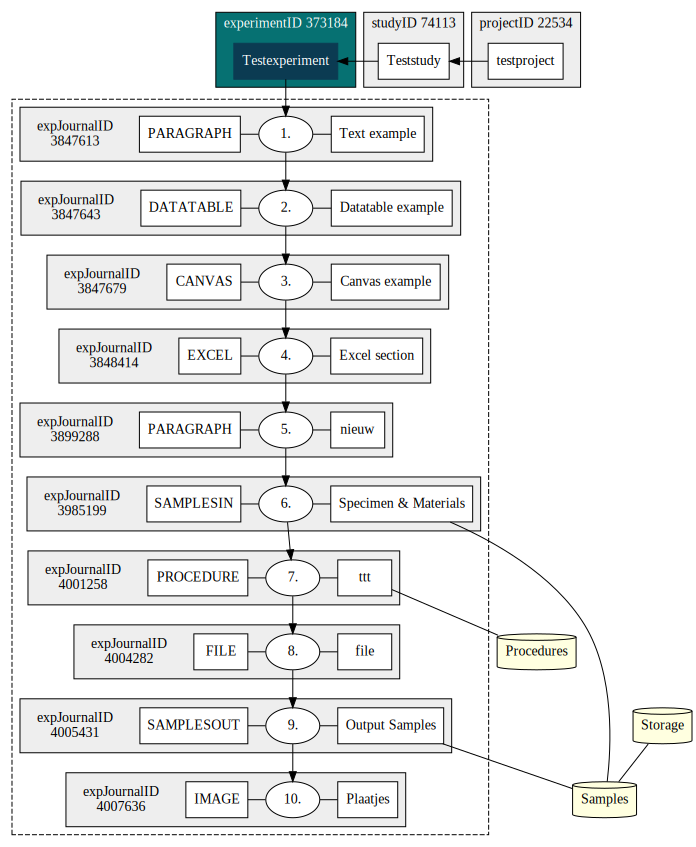

Experiment 'Testexperiment' (373184)
|
|  Available methods, use help() on this object for more detailed information:
|
|  add(data, title, order)
|    Add a new section to this experiment.
|  data()
|    Get data.
|  id()
|    Get id.
|  name()
|    Get the name.
|  section(id)
|    Get within this experiment the section object with provided id.
|  sections(*args, **kwargs)
|    Get object to access sections.
|  show()
|    Show the content of this experiment.
|  title()
|    Get the title.
|  visualize()
|    Show visualization.

In [8]:
firstExperiment = experiments.first()
display(firstExperiment.visualize())
firstExperiment

It is also possible to get an experiment directly by id.

In [9]:
firstExperimentID = firstExperiment.id()
print(firstExperimentID)
experiment = eLAB.experiment(firstExperimentID)
experiment.title()

373184


"Experiment 'Testexperiment' (373184)"

## Sections

From an **experiment object**, we can get an object describing all sections

In [10]:
sections = experiment.sections()
allSections = sections.all(["order", "sectionHeader", "sectionType", "lastEditUserFirstName", "lastEditUserLastName"])
allSections

,order,sectionHeader,sectionType,lastEditUserFirstName,lastEditUserLastName
expJournalID,,,,,
3847613,1,Text example,PARAGRAPH,Matthijs,Brouwer
3847643,2,Datatable example,DATATABLE,Matthijs,Brouwer
3847679,3,Canvas example,CANVAS,Matthijs,Brouwer
3848414,4,Excel section,EXCEL,Matthijs,Brouwer
3899288,5,nieuw,PARAGRAPH,Matthijs,Brouwer
3985199,6,Specimen & Materials,SAMPLESIN,Matthijs,Brouwer
4001258,7,ttt,PROCEDURE,Matthijs,Brouwer
4004282,8,file,FILE,Matthijs,Brouwer
4005431,9,Output Samples,SAMPLESOUT,Matthijs,Brouwer


As can be seen from this list, there are multiple *sectionTypes*. For each of these types, we get the first id.

In [11]:
paragraphSectionId = allSections[allSections["sectionType"]=="PARAGRAPH"].index[0]
procedureSectionId = allSections[allSections["sectionType"]=="PROCEDURE"].index[0]
imageSectionId = allSections[allSections["sectionType"]=="IMAGE"].index[0]
fileSectionId = allSections[allSections["sectionType"]=="FILE"].index[0]
datatableSectionId = allSections[allSections["sectionType"]=="DATATABLE"].index[0]
canvasSectionId = allSections[allSections["sectionType"]=="CANVAS"].index[0]
excelSectionId = allSections[allSections["sectionType"]=="EXCEL"].index[0]

## Sectiontype FILE
A **section object** can be of type 'IMAGE'

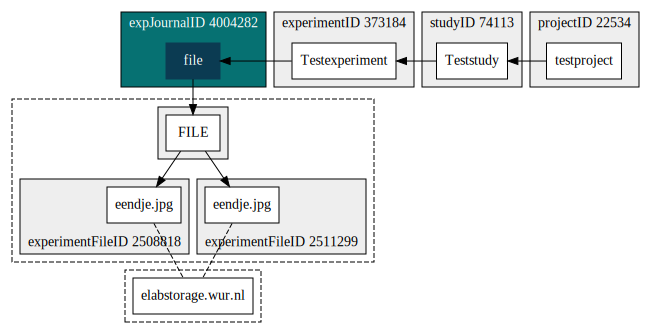

In [12]:
sectionFile = eLAB.section(fileSectionId)
sectionFile.visualize()

In [13]:
sectionFile.show()

## Sectiontype IMAGE
A **section object** can be of type 'IMAGE'

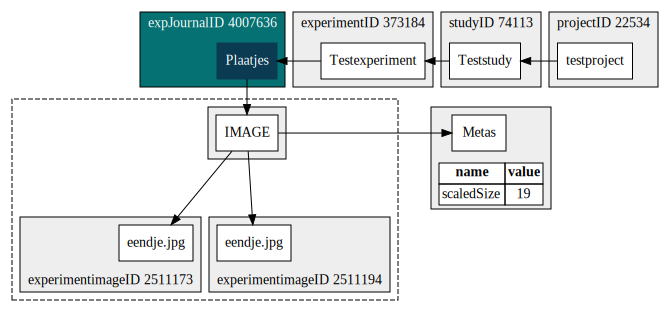

In [14]:
sectionImage = eLAB.section(imageSectionId)
sectionImage.visualize()


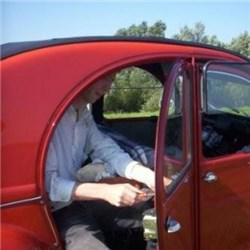
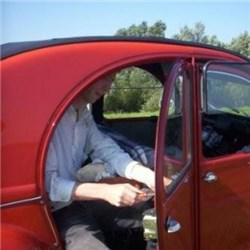

In [15]:
sectionImage.show()

## Sectiontype PARAGRAPH
A **section object** can be of type 'PARAGRAPH'

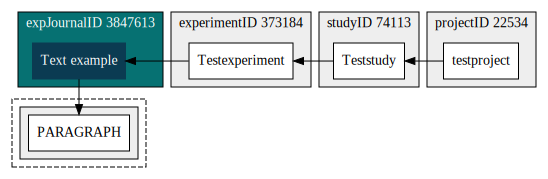

In [16]:
sectionParagraph = eLAB.section(paragraphSectionId)
sectionParagraph.visualize()

And we can view its content

In [17]:
sectionParagraph.show()

## Sectiontype PROCEDURE
A **section object** can be of type 'PROCEDURE'

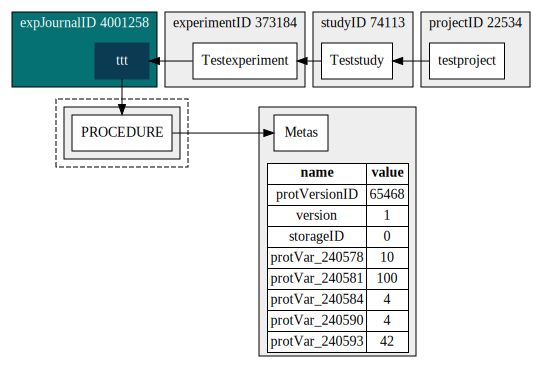

In [18]:
sectionProcedure = eLAB.section(procedureSectionId)
sectionProcedure.visualize()

And we can view its content

In [19]:
sectionProcedure.show()

initial denaturation,95°C,3 min,
,,,
denaturation,95°C,10 sec,
anealing,X°C,10 sec,40x
elongation,72°C,30 sec,
,,,
final elongation,95°C,10 sec,
,,,
meltcurve65,65°C,5 sec,
,95°C,0.5°C,


## Sectiontype DATATABLE
A **section object** can be of type 'DATATABLE'

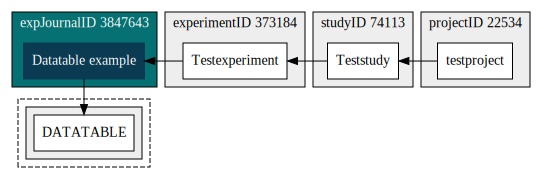

In [20]:
sectionDatatable = eLAB.section(datatableSectionId)
sectionDatatable.visualize()

We can get the data from this section.

In [21]:
sectionDatatable_data = sectionDatatable.get()
display(sectionDatatable_data)

,0,1,2,3
0,Sample 1,1.34,23.3,
1,Sample 2,2.54,53.1,
2,Sample 3,3.45,33.8,
3,Sample 4,2.55,34.2,
4,Sample 5,1.59,32.9,


The do further analysis within python

In [22]:
import pandas as pd
#make numeric if possible
sectionDatatable_adjusted = sectionDatatable_data.apply(pd.to_numeric, errors='coerce').combine_first(sectionDatatable_data)
#add column with average
sectionDatatable_adjusted[3] = sectionDatatable_adjusted.loc[:,1:2].mean(axis=1)
#create plot
sectionDatatable_plot = sectionDatatable_adjusted.set_index([0]).plot(kind="bar")

Results can be stored again in eLABJournal

In [23]:
#set adjusted data
sectionDatatable.set(sectionDatatable_adjusted)
#show new data in section2
display(sectionDatatable.get())
#return to original data
sectionDatatable.set(sectionDatatable_data)

,0,1,2,3
0,Sample 1,1.34,23.3,12.32
1,Sample 2,2.54,53.1,27.82
2,Sample 3,3.45,33.8,18.625
3,Sample 4,2.55,34.2,18.375
4,Sample 5,1.59,32.9,17.245


## Sectiontype CANVAS
A **section object** can be of type 'CANVAS'

For example a generated plot can be added as a drawing on a CANVAS section

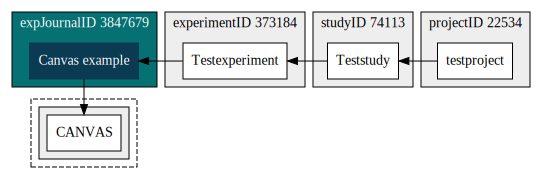

In [24]:
sectionCanvas = eLAB.section(canvasSectionId)
sectionCanvas.visualize()


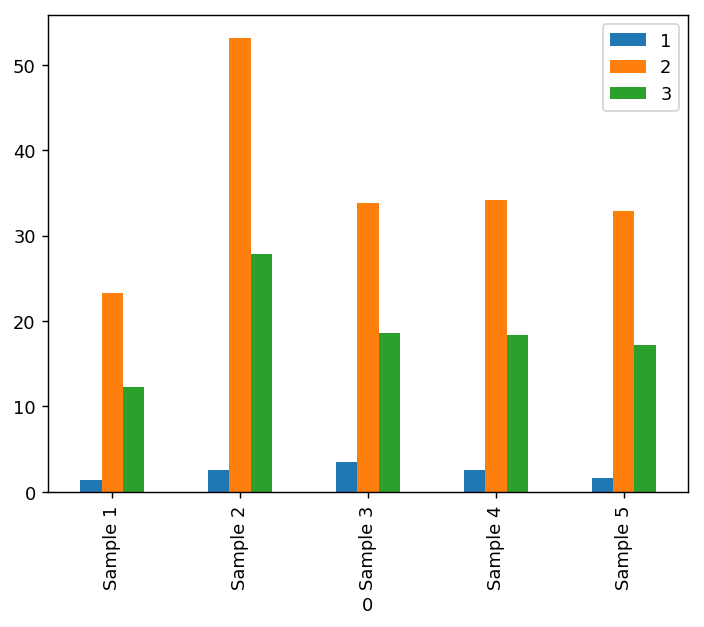

In [25]:
#set from figure
sectionCanvas.set(sectionDatatable_plot.get_figure())
#get from eLABJournal
sectionCanvas_image = sectionCanvas.get()
#show
display(sectionCanvas.show())
#set from png
sectionCanvas.set(sectionCanvas_image)

## Sectiontype EXCEL
A section object can be of type 'EXCEL'

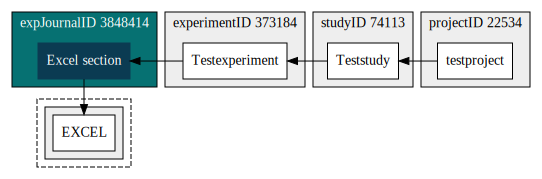

In [26]:
sectionExcel = eLAB.section(excelSectionId)
sectionExcel.visualize()


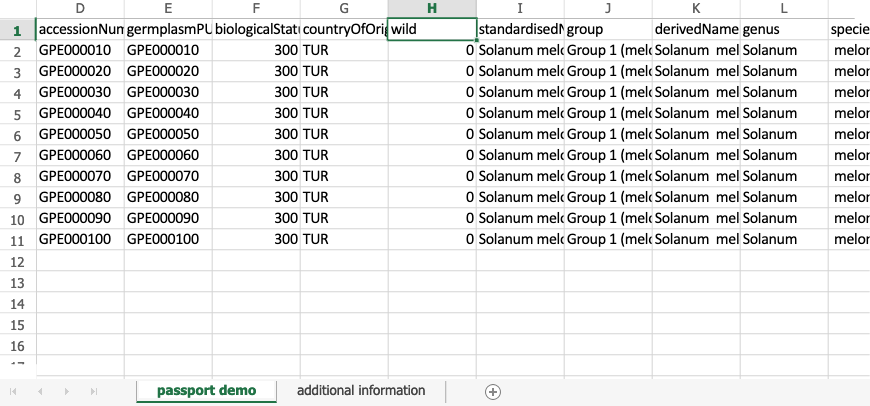

In [27]:
sectionExcel.show()

In [28]:
xls = sectionExcel.get()
sheet_names = xls.sheet_names
display(sheet_names)

['passport demo', 'additional information']

In [29]:
import pandas as pd
section4_excel_sheet = pd.read_excel(xls,sheet_name=sheet_names[0])
display(section4_excel_sheet)

,heterogeneity,germplasmDbId,accessionNumber,germplasmPUI,biologicalStatusOfAccessionCode,countryOfOriginCode,wild,standardisedName,group,derivedName,...,taxonIds,speciesAuthority,subtaxa,subtaxaAuthority,donors,acquisitionDate,additionalStandardisedName,additionalInstituteCode,estimatedStandardisedName,estimatedWild
GPE000010,0.999071,1232375,GPE000010,GPE000010,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,301712E,NaN,362213N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000020,0.979045,1232376,GPE000020,GPE000020,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,30381.34E,NaN,37350.07N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000030,0.996838,1232377,GPE000030,GPE000030,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,302115.99E,NaN,374541.88N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000040,0.996114,1232378,GPE000040,GPE000040,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,30381.34E,NaN,37350.07N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000050,0.998226,1232379,GPE000050,GPE000050,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,30381.34E,NaN,37350.07N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000060,0.995185,1232380,GPE000060,GPE000060,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,30381.34E,NaN,37350.07N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000070,0.994256,1232381,GPE000070,GPE000070,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,30381.34E,NaN,37350.07N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000080,0.997297,1232382,GPE000080,GPE000080,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,302640.11E,NaN,373436.86N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000090,0.983359,1232383,GPE000090,GPE000090,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,302640.11E,NaN,373436.86N,NaN,NaN,NaN,NaN,Solanum melongena,0
GPE000100,0.989438,1232384,GPE000100,GPE000100,300,TUR,0,Solanum melongena,Group 1 (melongena and closest relatives),Solanum melongena L.,...,NaN,302640.11E,NaN,373436.86N,NaN,NaN,NaN,NaN,Solanum melongena,0


## Add a new section
Or we can create a completely new section

In [30]:
#import pandas as pd
#new_data = pd.DataFrame([["one","two"],["three","four"]])
#new_section = experiment.add(new_data, "New section")

## Show full experiment

Sample 1,1.34,23.3,
Sample 2,2.54,53.1,
Sample 3,3.45,33.8,
Sample 4,2.55,34.2,
Sample 5,1.59,32.9,
initial denaturation,95°C,3 min,
,,,
denaturation,95°C,10 sec,
anealing,X°C,10 sec,40x
elongation,72°C,30 sec,
,,,

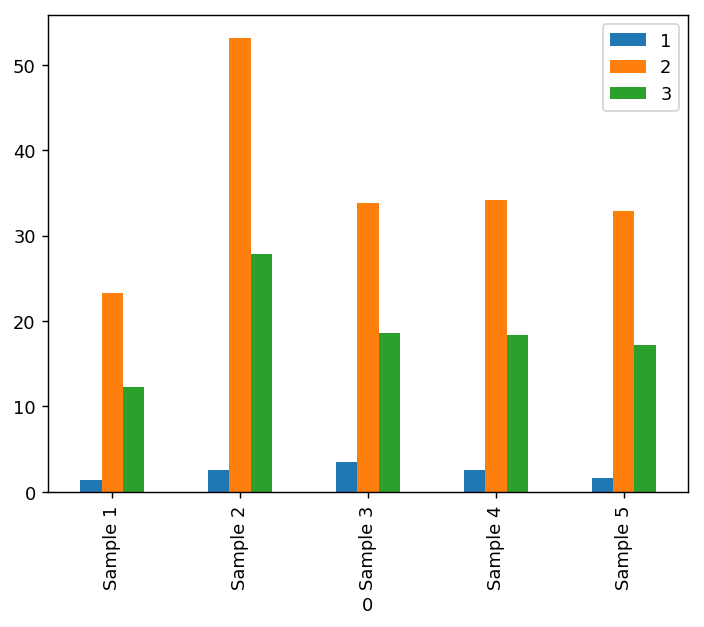
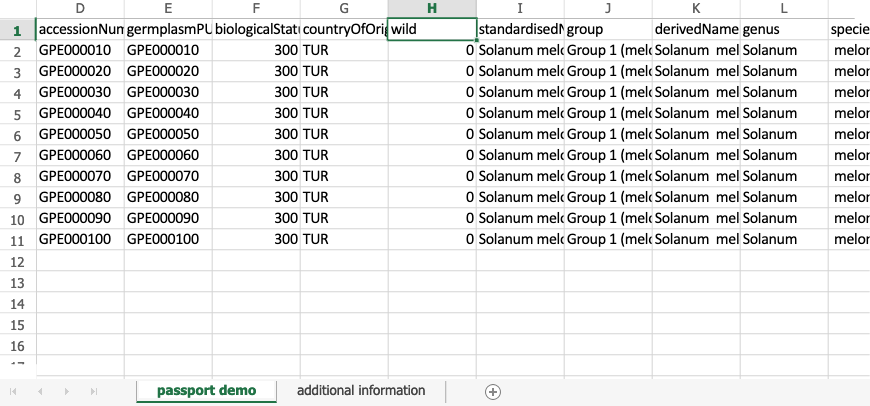
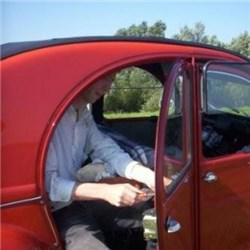
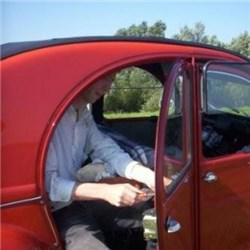

In [31]:
experiment.show()